In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

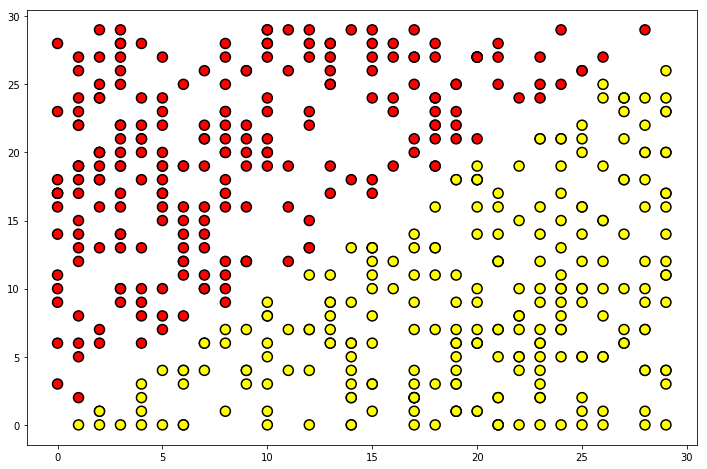

In [44]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

def get_grid(data, eps=0.1):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps), np.arange(y_min, y_max, eps))

def get_accuracy(alg, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  alg.fit(X_train, y_train)
  y_predicted = alg.predict(X_test)
  return accuracy_score(y_test, y_predicted)

def plot_alg(alg, X, y):
  alg.fit(X, y)
  xx, yy = get_grid(X)
  predicted = alg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  plt.figure(figsize=(12,8))
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')
  plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap='autumn', edgecolors='black', linewidth=1.5)
  plt.title("accuracy: " + str(get_accuracy(alg, X, y)))
  plt.show()

X, y = form_linearly_separable_data()
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap='autumn', edgecolors='black', linewidth=1.5);

# Тестирование алгоритмов

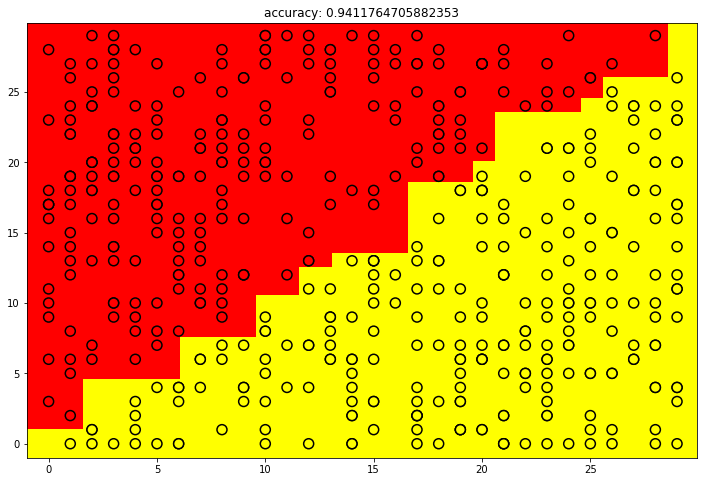

In [45]:
from sklearn.tree import DecisionTreeClassifier
plot_alg(DecisionTreeClassifier(), X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


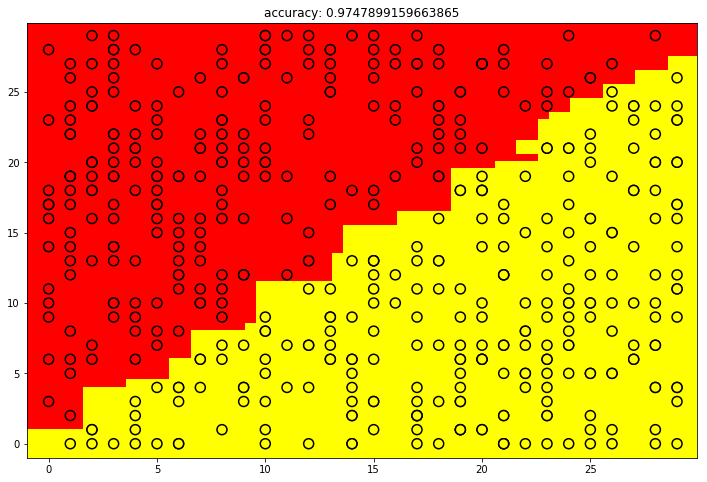

In [46]:
from sklearn.ensemble import RandomForestClassifier
plot_alg(RandomForestClassifier(), X, y)

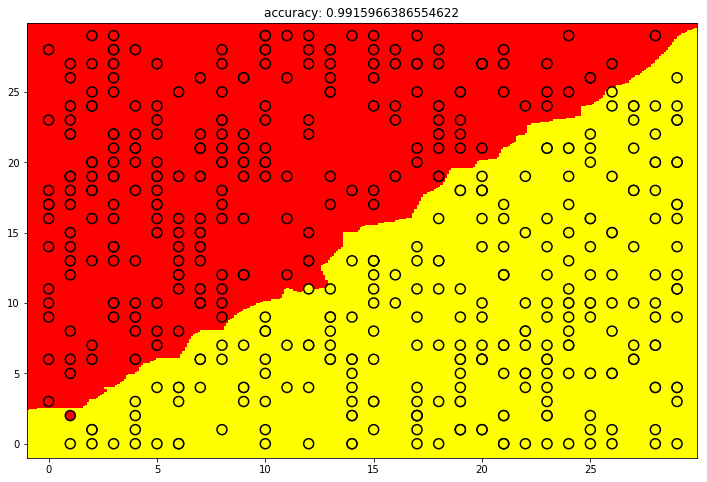

In [47]:
from sklearn.neighbors import KNeighborsClassifier
plot_alg(KNeighborsClassifier(), X, y)

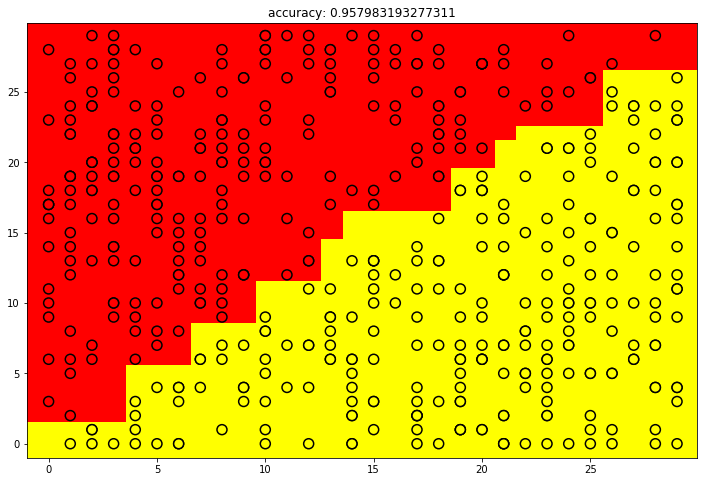

In [48]:
from sklearn.ensemble import AdaBoostClassifier
plot_alg(AdaBoostClassifier(), X, y)

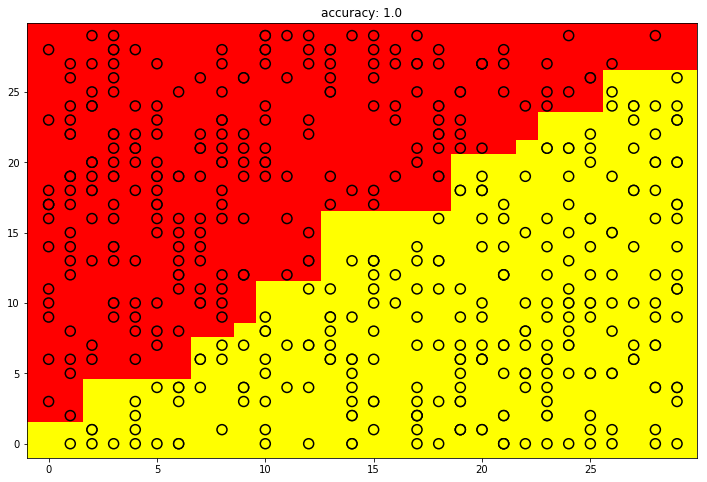

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
plot_alg(GradientBoostingClassifier(), X, y)